In [4]:
from chxanalys.chx_packages import *
%matplotlib notebook
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pds
from chxanalys.chx_xpcs_xsvs_jupyter_V1 import *
#%reset -f  #for clean up things in the memory

In [5]:
%matplotlib notebook

# Define Result Path here

In [6]:
data_dir = '/XF11ID/analysis/2017_3/lwiegart/Results/' # path to retrieve the pre-processed correlation functions
result_dir = '/XF11ID/analysis/2017_3/lwiegart/Results/'
os.makedirs(result_dir, exist_ok=True)
print('Results from this analysis will be stashed in the directory %s' % result_dir)

Results from this analysis will be stashed in the directory /XF11ID/analysis/2017_3/lwiegart/Results/


# Control the Calculations:

In [7]:
save_data=True
phi_analysis=True # True/False, TRUE: tries to load filename = 'uid=%s_phi_Res.h5'%uid_full
isotropic_age=False # True/False: use isotropic (evenly spaced) or custom defined age times
time_sampling='log' # time sampling for the g2(tau) functions from two-time correlation function: 'log' / 'linear'

# specify uid to be analyzed:

In [8]:
#uids to analyse (note: need two-time correlation functions from XPCS pipeline)
uid = '62e14e' #(scan num: 7917 (Measurement: .2s 400fr 25% stretch @1mm/s SumitomoI

In [9]:
# load data from XPCS pipeline
uid_full =  get_meta_data( uid )['uid']
total_res = {}

try:
    inDir =  data_dir + uid + '/'   #legacy: previously used 'short' uid for directory name...
    if phi_analysis:
        input_filename='uid=%s_phi_Res.h5'%uid_full
        total_res[uid] = extract_xpcs_results_from_h5( filename = 'uid=%s_phi_Res.h5'%uid_full, import_dir = inDir )
    else:
        print('tried: '+inDir+'uid=%s_Res.h5'%uid_full)
        input_filename='uid=%s_Res.h5'%uid_full
        total_res[uid] = extract_xpcs_results_from_h5( filename = 'uid=%s_Res.h5'%uid_full, import_dir = inDir )
except:
    inDir =  data_dir + uid_full + '/'   
    if phi_analysis:
        input_filename='uid=%s_phi_Res.h5'%uid_full
        total_res[uid] = extract_xpcs_results_from_h5( filename = 'uid=%s_phi_Res.h5'%uid_full, import_dir = inDir )
    else:
        print('also tried: '+inDir+'uid=%s_Res.h5'%uid_full)
        input_filename='uid=%s_Res.h5'%uid_full
        total_res[uid] = extract_xpcs_results_from_h5( filename = 'uid=%s_Res.h5'%uid_full, import_dir = inDir )

#total_res[uid] = extract_xpcs_results_from_h5( filename = 'uid=%s_phi_Res.h5'%uid_full, import_dir = inDir+ uid + '/' )

print( total_res[uid].keys()   )

dict_keys(['pixel_mask', 'taus', 'qval_dict_v', 'avg_img', 'taus_uids', 'mean_int_sets', 'tausb', 'g2b', 'mask', 'qval_dict_p', 'roi_mask', 'iqst', 'times_roi', 'taus4', 'qval_dict', 'g2', 'imgsum', 'g12b', 'qt', 'g4', 'g2_uids', 'q_saxs', 'g2_fit_paras', 'bad_frame_list', 'md', 'iq_saxs', 'g2b_fit_paras'])


# Extract result here

# re-print 2-time correlation function

In [10]:
#dataset_no=0
#u=sorted(list(uid_dict.keys()))[dataset_no]
#print(u)
#g12b=total_res[u]['g12b']
g12b=total_res[uid]['g12b']

In [11]:
%run /home/yuzhang/chxanalys_link/chxanalys/Two_Time_Correlation_Function.py

In [12]:
fig, ax, im=show_C12(g12b, q_ind= 6, N1=5,logs=False,return_fig=True, N2=20000, vmin=1.00, vmax=1.25,
             timeperframe= total_res[uid]['md']['frame_time'], qlabel=total_res[uid]['qval_dict'],
         save=False, path= data_dir, uid = 'not_used', cmap=cmap_albula )



<IPython.core.display.Javascript object>

In [13]:
#import matplotlib.pyplot as plt
from modest_image import ModestImage, imshow

ax = plt.gca()
#imshow(ax,im)
plt.show(im)

#fig,ax=plt.subplots()

#plt.show()

In [14]:
show_C12(g12b, q_ind= 6, N1=5,logs=False, N2=20000, vmin=1.00, vmax=1.25,
             timeperframe= total_res[uid]['md']['frame_time'], qlabel=total_res[uid]['qval_dict'],
         save=False, path= data_dir, uid = 'not_used', cmap=cmap_albula )

<IPython.core.display.Javascript object>

# Get One-time by slicing Two-time

In [15]:
# create the input for "get_aged_g2_from_g12q":
# IF isotropic age points:
if isotropic_age:
    start_age=0;end_age=25   #age in seconds
    age_resolution=.5   #time (age) over which correlation functions are averaged [seconds]
    age_numbers=6
    age_edge, age_center = get_qedge(  qstart=np.ceil(start_age/total_res[uid]['md']['frame_time']), 
                                     qend= np.floor(end_age/total_res[uid]['md']['frame_time']), noqs = age_numbers, 
                                     qwidth= np.ceil(age_resolution/total_res[uid]['md']['frame_time'])  )   
    age_edge=np.ceil(age_edge+np.ceil(age_resolution/total_res[uid]['md']['frame_time'])/2)
    age_center=np.ceil(np.average(age_edge,1))
    age_time=np.round(age_center+(age_resolution/total_res[uid]['md']['frame_time'])/2)*total_res[uid]['md']['frame_time']
    age_width=np.ones(np.size(age_time))*np.round(age_resolution/2,2)
else:
    # IF Non-isotropic age points:
    ages=[5.5,6.5,7.5,8.5,10,20,30,40,50,60,70.] # age START points [seconds] (age time =  ages + age_width/2)
    age_width=[2,2,2,2,2,2,2,2,2,2,2]     #time (age) over which correlation functions are averaged [seconds]
    age_edge=[]
    for i in range(len(ages)):
        age_edge.append([np.ceil(ages[i]/total_res[uid]['md']['frame_time']),
                         np.floor((ages[i]+age_width[i])/total_res[uid]['md']['frame_time'])])
    age_edge=np.array(age_edge)
    age_center=age_center=np.ceil(np.average(age_edge,1))
    age_time=np.array(ages)+np.array(age_width)/2
    age_width=np.array(age_width)/2

In [16]:
### KEY FUNCTION:  !!!!!!!!!!!!!!!!!!!!!!
taus_aged_total=[]
g2_aged_total=[]
for i in total_res[uid]['qval_dict'].keys():
#for i in np.arange(69): ### works up to 68, error at 69...
    #print(i,np.shape(g12b[:,:,i]))
    taus_aged, g2_aged = get_aged_g2_from_g12q( g12b[:,:,i], age_edge, age_center,
                                           timeperframe= total_res[uid]['md']['frame_time'] ,time_sampling=time_sampling  )
    #print(taus_aged)
    for m in range(len(age_time)):
        taus_aged_total.append(taus_aged[sorted(list(taus_aged.keys()))[m]])
    for m in range(len(age_time)):
        g2_aged_total.append(g2_aged[sorted(list(g2_aged.keys()))[m]])

In [17]:
# plot aged correlation functions for Q and phi
for i in total_res[uid]['qval_dict'].keys():
    fig,host=plt.subplots()
    for l in range(len(age_time)):
        plt.semilogx(taus_aged_total[(i*len(age_time))+l],g2_aged_total[(i*len(age_time))+l],'o-',
                     label='t='+str(np.round(age_time[l],2))+'$\pm$'+str(np.round(age_width[l],2))+'s')
    try:
        plt.title('ROI #: '+str(i)+'  Q='+str(total_res[uid]['qval_dict'][i][0])+' $\Phi=$'+str(total_res[uid]['qval_dict'][i][1]))       
    except:
        plt.title('ROI #: '+str(i)+'  Q='+str(total_res[uid]['qval_dict'][i][0]))       
    plt.xlabel(r'$\tau [s]$');plt.ylabel(r'$g_2(\tau)$')
    plt.ylim(.95,1.35)
    plt.grid()
    plt.legend(fontsize=8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
if save_data:
    # create data objects that match HDF5 format:   
    taus_aged_total=pad_length(arr=taus_aged_total)
    g2_aged_total=pad_length(arr=g2_aged_total)
    qval_dict=[]
    for i in total_res[uid]['qval_dict'].keys():
        qval_dict.append(total_res[uid]['qval_dict'][i])
    md=dict()
    md['uid']= get_meta_data( uid )['uid']
    md['input directory']=data_dir
    md['output directory']=result_dir
    md['input filename']=input_filename
    md['phi analysis']=phi_analysis
    md['isotropic age']=isotropic_age
    md['time sampling']=time_sampling

    Exdt = {} 
    for k,v in zip( ['md', 'q_dictionary','age_edge','age_center','age_time','age_width','taus_aged','g2_aged'],  
                   [md, qval_dict ,age_edge,age_center,age_time,age_width*2,taus_aged_total,g2_aged_total] ):
           Exdt[ k ] = v
    if phi_analysis:
        export_xpcs_results_to_h5( 'aged_analysis_phi_uid_%s.h5'%md['uid'], result_dir, export_dict = Exdt )
    else:
        export_xpcs_results_to_h5( 'aged_analysis_uid_%s.h5'%md['uid'], result_dir, export_dict = Exdt )
else:
    print('ATTENTION: DATA SAVING NOT ENABLED!')

The xpcs analysis results are exported to /XF11ID/analysis/2017_3/lwiegart/Results/ with filename as aged_analysis_phi_uid_62e14e37-128c-4474-9f53-92c25123daac.h5


# END of extracting aged g2s from two-time correlation functions
# Example of retrieving data from file:

In [19]:
# to load data:
if phi_analysis:
    extract_dict = extract_xpcs_results_from_h5( filename = 'aged_analysis_phi_uid_%s.h5'%md['uid'], import_dir = result_dir )
else:
    extract_dict = extract_xpcs_results_from_h5( filename = 'aged_analysis_uid_%s.h5'%md['uid'], import_dir = result_dir )
extract_dict.keys()

dict_keys(['taus_aged', 'qval_dict', 'qval_dict_v', 'taus_uids', 'age_center', 'age_width', 'qval_dict_p', 'age_time', 'q_dictionary', 'md', 'g2_aged', 'g2_uids', 'age_edge'])

<IPython.core.display.Javascript object>


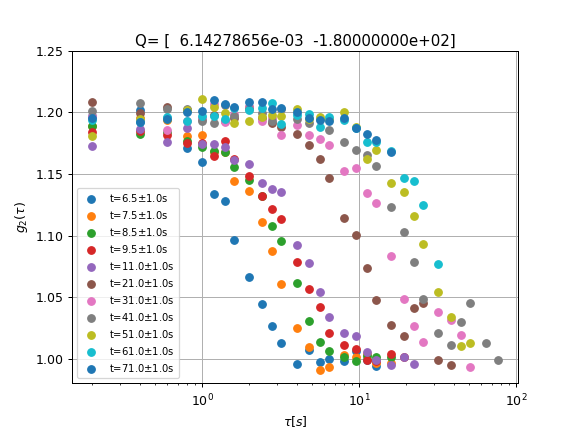

(0.98, 1.25)

In [24]:
qnr=6
fig,host=plt.subplots()
for i in range(len(extract_dict['age_time'])):
    plt.semilogx(extract_dict['taus_aged'][(qnr*len(extract_dict['age_time']))+i],
                 extract_dict['g2_aged'][(qnr*len(extract_dict['age_time']))+i],'o',
                 label='t='+str(np.round(extract_dict['age_time'][i],2))+'$\pm$'+str(np.round(extract_dict['age_width'][i]/2,2))+'s')   
plt.title('Q= '+str(extract_dict['q_dictionary'][qnr]))
plt.grid()
plt.xlabel(r'$\tau [s]$');plt.ylabel(r'$g_2(\tau)$')
plt.legend(fontsize=8)
plt.ylim(.98,1.25)
    

In [21]:
from scipy.optimize import curve_fit
def g2_fit_func(x, a, b, c, d):
    return a*np.exp( -2*(b*x)**c) +d

<IPython.core.display.Javascript object>


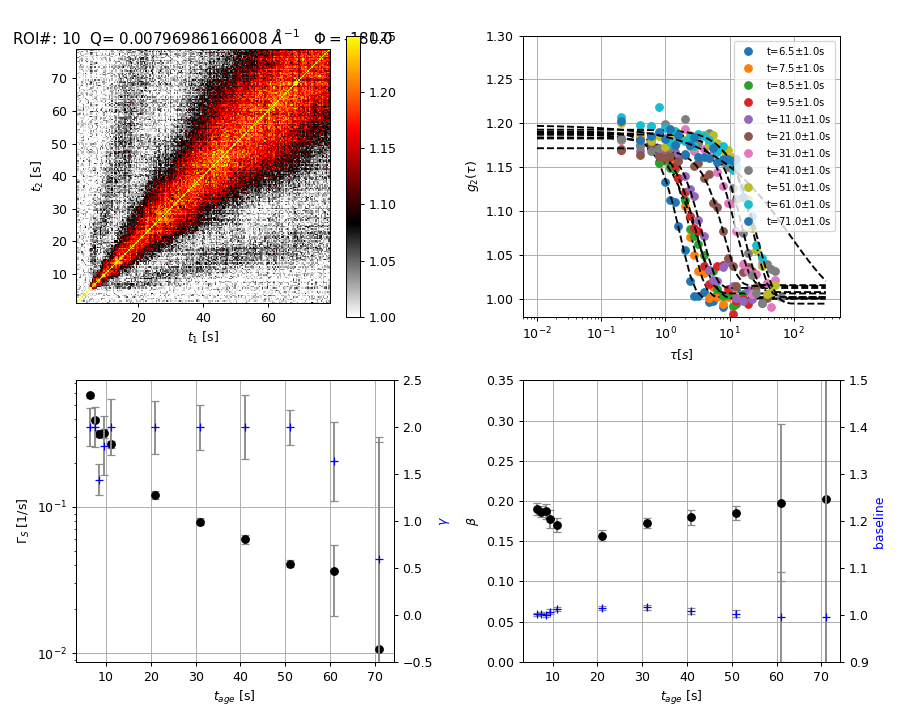

fit parameter: [ 0.18967611  0.57759563  2.          1.00103982]
standard deviation: [ 0.00734722  0.02050522  0.20228105  0.00266815]
fit parameter: [ 0.18678589  0.39211583  2.          1.00247105]
standard deviation: [ 0.00703896  0.01483307  0.21284436  0.00317167]
fit parameter: [ 0.1870588   0.3163517   1.44256385  1.0004904 ]
standard deviation: [ 0.00935938  0.01782499  0.16500257  0.00436225]
fit parameter: [ 0.17745547  0.31793188  1.80577431  1.00659246]
standard deviation: [ 0.01134191  0.02228425  0.31359016  0.00542473]
fit parameter: [ 0.17010745  0.26813843  2.          1.01283589]
standard deviation: [ 0.00854855  0.0152658   0.29914047  0.00453777]
fit parameter: [ 0.15676365  0.12097955  2.          1.01502507]
standard deviation: [ 0.00711153  0.0071493   0.28443924  0.00494813]
fit parameter: [ 0.17254163  0.07932263  2.          1.01603392]
standard deviation: [ 0.00654636  0.00411562  0.24115443  0.00492063]
fit parameter: [ 0.17952831  0.05983748  2.          1.

In [25]:
# fit single Q

qnr=10

from scipy.optimize import curve_fit
def g2_fit_func(x, a, b, c, d):
    return a*np.exp( -1*(b*x)**c) +d

beta_par=[];Gam_par=[];gam_par=[];base_par=[]
beta_par_err=[];Gam_par_err=[];gam_par_err=[];base_par_err=[]

fig, plt.subplots(nrows=2, ncols=2,figsize=(10, 8))
f = plt.gcf()
try:
    title_str='ROI#: '+str(qnr)+'  Q= '+str(extract_dict['q_dictionary'][qnr][0])+' $\AA^{-1}$   $\Phi=$'+str(extract_dict['q_dictionary'][qnr][1])
except:
    title_str='ROI#: '+str(qnr)+'  Q= '+str(extract_dict['q_dictionary'][qnr][0])+' $\AA^{-1} $'

# plot 2-time corr-function
plt.subplot(2,2,1)
ax = plt.gca()
#fig, ax = plt.subplots()
#show_C12(g12b, fig_ax = [fig,ax],  q_ind=1, qlabel=qval_dict, ...)

show_C12(g12b,fig_ax = [f,ax], q_ind= qnr, N1=5,logs=False, N2=20000, vmin=1.00, vmax=1.25,
             timeperframe= total_res[uid]['md']['frame_time'], qlabel=total_res[uid]['qval_dict'],
         save=False, path= data_dir, uid = 'not_used', cmap=cmap_albula )
ax.set_xlabel(r'$ t_{1}$ [s]',fontsize=10)
ax.set_ylabel(r'$ t_{2}$ [s]',fontsize=10)
ax.set_title(title_str)

### plot aged one-time correlation functions from two-time
plt.subplot(2,2,2)
for i in range(len(extract_dict['age_time'])):
    x=extract_dict['taus_aged'][(qnr*len(extract_dict['age_time']))+i]
    y=extract_dict['g2_aged'][(qnr*len(extract_dict['age_time']))+i]
    x = x[np.logical_not(np.isnan(x))]  # remove Nan for fit function and '0' time point
    y = y[np.logical_not(np.isnan(y))]
    xplot=np.logspace(-2,2.5)
    plt.semilogx(x,y,'o',label='t='+str(np.round(extract_dict['age_time'][i],2))+'$\pm$'+str(np.round(extract_dict['age_width'][i]/2,2))+'s')   
    popt, pcov = curve_fit(g2_fit_func, x[1:], y[1:] , p0= [.2,.5,1.5,1.],bounds=([.05,0.0001,0.1,.995],[.8,5000.,2.,1.05]))
    plt.semilogx(xplot ,g2_fit_func(xplot, *popt),'k--')
    print('fit parameter: '+str(popt))
    perr = np.sqrt(np.diag(pcov))
    print('standard deviation: '+str(perr))
    beta_par.append(popt[0]);Gam_par.append(popt[1]);gam_par.append(popt[2]);base_par.append(popt[3])
    beta_par_err.append(perr[0]);Gam_par_err.append(perr[1]);gam_par_err.append(perr[2]);base_par_err.append(perr[3]);
#plt.title('Q= '+str(extract_dict['q_dictionary'][qnr]))
plt.grid()
plt.xlabel(r'$\tau [s]$');plt.ylabel(r'$g_2(\tau)$')
plt.legend(fontsize=8)
plt.ylim(.98,1.3)

## plot relaxation rate and compression exponent
plt.subplot(2,2,3)
ax = plt.gca()
ax2 = ax.twinx()
ax.errorbar(extract_dict['age_time'],Gam_par, yerr=Gam_par_err, xerr=None, fmt='ko', ecolor='.55', elinewidth=None, capsize=3, 
             barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None,
             label=r'$ \Gamma_S $ [1/s]')
ax.set_xlabel(r'$ t_{age}$ [s]')
ax.set_ylabel('$ \Gamma_S $ [1/s]')
ax2.errorbar(extract_dict['age_time'],gam_par, yerr=gam_par_err, xerr=None, fmt='b+', ecolor='.55', elinewidth=None, capsize=3, 
             barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None,
             label=r'$ \gamma $')
    #ax2.plot(d_time,np.array(temperature_time),'m+',markersize=8,label='sample temperature')
    #ax2.plot(temperature_epoch-float(start_time),temperature_archive,'m--')
ax2.set_ylim(ymin=-.5,ymax=2.5)
ax2.set_ylabel('$ \gamma $',color='b')
    #ax.tick_params(labelsize=16)
ax.set_yscale('log')#;pyplot.xscale('log')
ax.grid(True)
    #ax2.tick_params(labelsize=16)
    #plt.title('Q = '+q_time[0]+' (1/A)',fontsize=22)

## plot coherence factor and baseline
plt.subplot(2,2,4)
ax = plt.gca()
ax2 = ax.twinx()
ax.errorbar(extract_dict['age_time'],beta_par, yerr=beta_par_err, xerr=None, fmt='ko', ecolor='.55', elinewidth=None, capsize=3, 
             barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None,
             label='beta')
ax.set_xlabel(r'$ t_{age}$ [s]')
ax.set_ylabel(r'$ \beta $')
ax.set_ylim(ymin=0,ymax=.35)
ax2.errorbar(extract_dict['age_time'],base_par, yerr=base_par_err, xerr=None, fmt='b+', ecolor='.55', elinewidth=None, capsize=3, 
             barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None,
             label='baseline')
    #ax2.plot(d_time,np.array(temperature_time),'m+',markersize=8,label='sample temperature')
    #ax2.plot(temperature_epoch-float(start_time),temperature_archive,'m--')
ax2.set_ylim(ymin=.9,ymax=1.5)
ax2.set_ylabel('baseline ',color='b')
    #ax.tick_params(labelsize=16)
#ax.set_yscale('log')#;pyplot.xscale('log')
ax.grid(True)
    #ax2.tick_params(labelsize=16)
    #plt.title('Q = '+q_time[0]+' (1/A)',fontsize=22)
    
#plt.suptitle(title_str, fontsize=14)  
plt.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.show()
  

In [ ]:
# how to find 'steps' in the data...?
#fig,host=plt.subplots()
Gam_par[0]=5
print(Gam_par)
np.diff(Gam_par)
#plt.plot(np.arange(np.diff(Gam_par)),np.diff(Gam_par),'o-')

In [ ]:
fig,host=plt.subplots()
plt.plot(extract_dict['age_time'],base_par)

In [ ]:
fig,host=plt.subplots()
ax = plt.gca()
ax2 = host.twinx()
ax.errorbar(extract_dict['age_time'],base_par, yerr=base_par_err, xerr=None, fmt='ko', ecolor='.55', elinewidth=None, capsize=3, 
             barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None,
             label=r'$ \beta_S $ [1/s]')
ax.set_xlabel(r'$ t_{age}$ [s]')
ax.set_ylabel(r'$ \beta $ ')
#ax.set_ylim(ymin=0,ymax=.5)
ax2.errorbar(extract_dict['age_time'],Gam_par, yerr=Gam_par_err, xerr=None, fmt='b+', ecolor='.55', elinewidth=None, capsize=3, 
             barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None,
             label=r'$ \baseline $')

ax2.plot(extract_dict['age_time'],base_par)
#ax2.set_ylim(ymin=.95,ymax=1.5)
ax2.set_ylabel('$ \baseline $',color='b')
    #ax.tick_params(labelsize=16)
#ax.set_yscale('log')#;pyplot.xscale('log')
ax.grid(True)

In [ ]:
"""
Thomas Kahn
thomas.b.kahn@gmail.com
"""
from __future__ import absolute_import
from math import sqrt
import multiprocessing as mp
import numpy as np
from six.moves import range
from six.moves import zip


def t_scan(L, window = 1e3, num_workers = -1):
    """
    Computes t statistic for i to i+window points versus i-window to i
    points for each point i in input array. Uses multiple processes to
    do this calculation asynchronously. Array is decomposed into window
    number of frames, each consisting of points spaced at window
    intervals. This optimizes the calculation, as the drone function
    need only compute the mean and variance for each set once.
    Parameters
    ----------
    L : numpy array
        1 dimensional array that represents time series of datapoints
    window : int / float
        Number of points that comprise the windows of data that are
        compared
    num_workers : int
        Number of worker processes for multithreaded t_stat computation
        Defult value uses num_cpu - 1 workers
    Returns
    -------
    t_stat : numpy array
        Array which holds t statistic values for each point. The first 
        and last (window) points are replaced with zero, since the t
        statistic calculation cannot be performed in that case.
    """
    size    = L.size
    window  = int(window)
    frames  = list(range(window))
    n_cols  = (size // window) - 1
    
    t_stat  = np.zeros((window, n_cols))

    if num_workers == 1:
        results = [_t_scan_drone(L, n_cols, frame, window) for frame in frames]
    else:
        if num_workers == -1:
            num_workers = mp.cpu_count() - 1
        pool    = mp.Pool(processes = num_workers)
        results = [pool.apply_async(_t_scan_drone, args=(L, n_cols, frame, window)) for frame in frames]
        results = [r.get() for r in results]
        pool.close()

    for index, row in results:
        t_stat[index] = row
    
    t_stat  = np.concatenate((
        np.zeros(window),
        t_stat.transpose().ravel(order='C'),
        np.zeros(size % window)
    ))

    return t_stat


def _t_scan_drone(L, n_cols, frame, window=1e3):
    """
    Drone function for t_scan. Not Intended to be called manually.
    Computes t_scan for the designated frame, and returns result as
    array along with an integer tag for proper placement in the 
    aggregate array
    """
    size   = L.size
    window = int(window)
    root_n = sqrt(window)

    output = np.zeros(n_cols)
    b      = L[frame:window+frame]
    b_mean = b.mean()
    b_var  = b.var()
    for i in range(window+frame, size-window, window):
        a = L[i:i+window]
        a_mean = a.mean()
        a_var  = a.var()
        output[i // window - 1] = root_n * (a_mean - b_mean) / sqrt(a_var + b_var)
        b_mean, b_var = a_mean, a_var

    return frame, output


def mz_fwt(x, n=2):
    """
    Computes the multiscale product of the Mallat-Zhong discrete forward
    wavelet transform up to and including scale n for the input data x.
    If n is even, the spikes in the signal will be positive. If n is odd
    the spikes will match the polarity of the step (positive for steps
    up, negative for steps down).
    This function is essentially a direct translation of the MATLAB code
    provided by Sadler and Swami in section A.4 of the following:
    http://www.dtic.mil/dtic/tr/fulltext/u2/a351960.pdf
    Parameters
    ----------
    x : numpy array
        1 dimensional array that represents time series of data points
    n : int
        Highest scale to multiply to
    Returns
    -------
    prod : numpy array
        The multiscale product for x
    """
    N_pnts   = x.size
    lambda_j = [1.5, 1.12, 1.03, 1.01][0:n]
    if n > 4:
        lambda_j += [1.0]*(n-4)
    
    H = np.array([0.125, 0.375, 0.375, 0.125])
    G = np.array([2.0, -2.0])
    
    Gn = [2]
    Hn = [3]
    for j in range(1,n):
        q = 2**(j-1)
        Gn.append(q+1)
        Hn.append(3*q+1)

    S    = np.concatenate((x[::-1], x))
    S    = np.concatenate((S, x[::-1]))
    prod = np.ones(N_pnts)
    for j in range(n):
        n_zeros = 2**j - 1
        Gz      = _insert_zeros(G, n_zeros)
        Hz      = _insert_zeros(H, n_zeros)
        current = (1.0/lambda_j[j])*np.convolve(S,Gz)
        current = current[N_pnts+Gn[j]:2*N_pnts+Gn[j]]
        prod    *= current
        if j == n-1:
            break
        S_new   = np.convolve(S, Hz)
        S_new   = S_new[N_pnts+Hn[j]:2*N_pnts+Hn[j]]
        S       = np.concatenate((S_new[::-1], S_new))
        S       = np.concatenate((S, S_new[::-1]))
    return prod


def _insert_zeros(x, n):
    """
    Helper function for mz_fwt. Splits input array and adds n zeros
    between values.
    """
    newlen       = (n+1)*x.size
    out          = np.zeros(newlen)
    indices      = list(range(0, newlen-n, n+1))
    out[indices] = x
    return out


def find_steps(array, threshold):
    """
    Finds local maxima by segmenting array based on positions at which
    the threshold value is crossed. Note that this thresholding is 
    applied after the absolute value of the array is taken. Thus,
    the distinction between upward and downward steps is lost. However,
    get_step_sizes can be used to determine directionality after the
    fact.
    Parameters
    ----------
    array : numpy array
        1 dimensional array that represents time series of data points
    threshold : int / float
        Threshold value that defines a step
    Returns
    -------
    steps : list
        List of indices of the detected steps
    """
    steps        = []
    array        = np.abs(array)
    above_points = np.where(array > threshold, 1, 0)
    ap_dif       = np.diff(above_points)
    cross_ups    = np.where(ap_dif == 1)[0]
    cross_dns    = np.where(ap_dif == -1)[0]
    for upi, dni in zip(cross_ups,cross_dns):
        steps.append(np.argmax(array[upi:dni]) + upi)
    return steps


def get_step_sizes(array, indices, window=1000):
    """
    Calculates step size for each index within the supplied list. Step
    size is determined by averaging over a range of points (specified
    by the window parameter) before and after the index of step
    occurrence. The directionality of the step is reflected by the sign
    of the step size (i.e. a positive value indicates an upward step,
    and a negative value indicates a downward step). The combined 
    standard deviation of both measurements (as a measure of uncertainty
    in step calculation) is also provided.
    Parameters
    ----------
    array : numpy array
        1 dimensional array that represents time series of data points
    indices : list
        List of indices of the detected steps (as provided by 
        find_steps, for example)
    window : int, optional
        Number of points to average over to determine baseline levels
        before and after step.
    Returns
    -------
    step_sizes : list
        List of the calculated sizes of each step
    step_error : list
    """
    step_sizes = []
    step_error = []
    indices    = sorted(indices)
    last       = len(indices) - 1
    for i, index in enumerate(indices):
        if i == 0:
            q = min(window, indices[i+1]-index)
        elif i == last:
            q = min(window, index - indices[i-1])
        else:
            q = min(window, index-indices[i-1], indices[i+1]-index)
        a = array[index:index+q]
        b = array[index-q:index]
        step_sizes.append(a.mean() - b.mean())
        step_error.append(sqrt(a.var()+b.var()))
    return step_sizes, step_error



In [ ]:
import numpy as np
#import step_detect
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, gridplot
from scipy.ndimage.filters import gaussian_filter1d

In [ ]:
def gen_data(A, sd, scaling):
    """
    Generates test data of the sort used by Sadler and Swami.
    Set sd to 0 for noise-free (ideal) data 
    """
    
    x = np.linspace(0, 500, 500*scaling)
    
    data = np.zeros_like(x)
    data[np.logical_and(x > 50, x < 150)] = 1
    data[np.logical_and(x > 200, x < 250)] = 1
    data[np.logical_and(x > 300, x < 310)] = 1
    data[np.logical_and(x > 360, x < 365)] = 1
    data[np.logical_and(x > 416, x < 417)] = 1
    data[np.logical_and(x > 442, x < 443)] = 1
    data[np.logical_and(x > 445, x < 446)] = 1
    data *= A
    if sd:
        data += np.random.normal(scale = sd, size=x.shape)
    

    return data, x

In [ ]:
A       = 10  # amplitude of signal
sd      = 1   # sd of added Gaussian noise
scaling = 100 # scaling of sampling rate

data, x = gen_data(A, 1, scaling)

fig,host=plt.subplots()
plt.plot(x, data,'m-')

#f = figure(width=950, height=200, y_range=[-0.5*A, 1.5*A])
#f.line(x, data, color='navy')
#show(f)

In [ ]:
# Deritave of Gaussian wavelet convolution can be done with a SciPy function
dg1 = gaussian_filter1d(data, 20, order=1)
dg1 /= np.abs(dg1).max() # normalizing here to facillitate comparison despite vastly varying magnitudes
dg2 = gaussian_filter1d(data, 100, order=1)
dg2 /= np.abs(dg2).max()

# Multiscale product is calculated using mz_fwt (Mallat and Zhong Forward Wavelet Transform)
#p2  = step_detect.mz_fwt(data, n=2)
p2  = mz_fwt(data, n=2)
p2 /= np.abs(p2).max()
#p3  = step_detect.mz_fwt(data, n=3)
p3  = mz_fwt(data, n=3)
p3 /= np.abs(p3).max()

#t1  = step_detect.t_scan(data, window=250)
t1  = t_scan(data, window=250)
t1 /= np.abs(t1).max()
#t2  = step_detect.t_scan(data, window=500)
t2  = t_scan(data, window=500)
t2 /= np.abs(t2).max()

#f1 = figure(width=950, height=200, y_range=[-0.5*A, 1.5*A], title='Input Data')
#f2 = figure(width=950, height=200, x_range=f1.x_range, title='Derivative of Gaussian Wavelet Convolution')
#f3 = figure(width=950, height=200, x_range=f1.x_range, title='Multiscale Product')
#f4 = figure(width=950, height=200, x_range=f1.x_range, title='T-statistic Scan')


fig,host=plt.subplots()
plt.plot(x, data,'m-')
plt.title('Input Data')

fig,host=plt.subplots()
plt.plot(x, dg1,'m-',label='sigma = 20')
plt.plot(x, dg2,'r-',label='sigma = 100')
plt.title('Derivative of Gaussian Wavelet Convolution')
plt.legend()


fig,host=plt.subplots()
plt.plot(x, p2,'m-',label='p2')
plt.plot(x, p3,'r-',label='p3')
plt.title('Multiscale Product')
plt.legend()

fig,host=plt.subplots()
plt.plot(x, t1,'m-',label='window = 250 points')
plt.plot(x, t2,'r-',label='window = 500 points')
plt.title('Multiscale Product')
plt.legend()

#f1.line(x, data, color='navy')

#f2.line(x, dg1, color='navy', legend='sigma = 20')
#f2.line(x, dg2, color='firebrick', legend='sigma = 100')

#f3.line(x, p2, color='navy', legend='p2')
#f3.line(x, p3, color='firebrick', legend='p3')

#f4.line(x, t1, color='navy', legend='window = 250 points')
#f4.line(x, t2, color='firebrick', legend='window = 500 points')

#f = gridplot([[f1], [f2], [f3], [f4]])
#show(f)

In [ ]:
arrays = [
    
    dg1,
    dg2,
    p2,
    p3,
    t1,
    t2
    
]

for array in arrays:
    print(find_steps(np.abs(array), 0.5))

In [ ]:
print(Gam_par)

In [ ]:
# try Gaussian wavelet filter 
dg1 = gaussian_filter1d(Gam_par, 20, order=1)
dg1 /= np.abs(dg1).max() # normalizing he
find_steps(np.abs(dg1), 0.5)
print(dg1)

In [ ]:
fig,host=plt.subplots()
plt.plot(extract_dict['age_time'],Gam_par,'o-')

In [ ]:
x=np.arange(10)
x=xdat[]
y=ydat
#y=g2_fit_func(x,a=.5,b=.2,c=1,d=.9)
fig,host=plt.subplots()
plt.semilogx(x,y,'o',label='data')
popt, pcov = curve_fit(g2_fit_func, x,y)
plt.semilogx(x,g2_fit_func(x, *popt))

In [ ]:
x=np.arange(10)
y=echo_fit_func(x,a=.5,b=.2,c=1)
fig,host=plt.subplots()
plt.semilogx(x,y,'o',label='data')
popt, pcov = curve_fit(echo_fit_func, x,y)
plt.semilogx(x,echo_fit_func(x, *popt))

In [ ]:
show_g12q_aged_g2( g12b[:,:,1], g2_aged,slice_width= 2000,
                  timeperframe=total_res[u]['md']['frame_time'],vmin= 1, vmax= 1.15, cmap=cmap_albula )

In [ ]:
x=np.arange(5)
x[1:]